### Importy

In [2]:
import os
import pandas as pd
import nltk
import gensim
from gensim import corpora, models, similarities     
from gensim.models.keyedvectors import KeyedVectors

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
# import seaborn as sns
# sns.set_style('darkgrid')
# sns.set_palette('muted')
# sns.set_context("notebook", font_scale=1.5,
#                 rc={"lines.linewidth": 2.5})

C:\Users\Ondrej\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Načítanie modelu

In [ ]:
fname = '../data/[SK]prim-6.1-public-all.shuffled.080cbow.bin'
# fname = '../data/[SK]prim-6.1-public-all.shuffled.300cbow.bin'
model = KeyedVectors.load_word2vec_format(fname, binary=True)  # C binary format

### Testy

In [37]:
model.most_similar('auto')

C:\Users\Ondrej\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('vozidlo', 0.9041661024093628),
 ('audi', 0.815388023853302),
 ('Vozidlo', 0.8106244802474976),
 ('autíčko', 0.8058905005455017),
 ('autá', 0.7575589418411255),
 ('lietadlo', 0.7411708831787109),
 ('volvo', 0.7363370060920715),
 ('motorky', 0.7091933488845825),
 ('béemvéčko', 0.7005671858787537),
 ('parkovisko', 0.6991091966629028)]

In [39]:
similarity = model.similarity('meno', 'názov')
similarity

C:\Users\Ondrej\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.3945008

In [40]:
result = model.most_similar(positive=['bol', 'jesť'])
result

C:\Users\Ondrej\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('jedol', 0.673903226852417),
 ('piť', 0.6668727397918701),
 ('Bol', 0.6548153758049011),
 ('vypiť', 0.6490421295166016),
 ('jedávať', 0.6437976360321045),
 ('požiť', 0.6435511112213135),
 ('Piť', 0.6390882134437561),
 ('pil', 0.6387069225311279),
 ('zasýtiť', 0.6346054077148438),
 ('Jesť', 0.6340925693511963)]

In [24]:
model['pes']

array([ 0.860767  , -2.9218206 , -0.23949303, -3.0608897 ,  1.1330297 ,
       -0.02861695,  1.7001405 , -3.3458905 ,  1.7478735 , -3.8184514 ,
       -0.7816023 ,  0.5637553 ,  1.3684096 ,  0.38463974,  0.05568203,
        2.3973448 , -1.3559191 , -0.5417815 ,  2.1319149 , -0.6393608 ,
        2.3632832 ,  2.3470252 , -2.312691  , -1.1669412 ,  1.217863  ,
       -2.1645155 ,  0.50951284,  2.9501216 , -1.3900253 ,  0.8769314 ,
        1.2879663 ,  0.10091176,  0.9955231 ,  1.8818142 , -2.6936755 ,
       -1.2148054 , -1.5949286 ,  2.6695979 ,  1.6858428 , -1.7406914 ,
       -0.39150336, -1.2788572 , -3.3159132 , -1.4606671 ,  1.5623341 ,
       -1.2308189 ,  3.128792  ,  2.0658107 , -0.6548679 ,  1.1385086 ,
        2.7954798 , -1.1037244 ,  2.2877398 ,  1.2918608 , -1.5608547 ,
       -0.66290075, -5.0794353 ,  0.8992122 , -1.8186612 ,  0.07498403,
       -2.4212875 ,  3.4052322 ,  1.1682613 ,  2.9091916 ,  1.4533259 ,
       -1.9738678 ,  1.5130624 ,  3.2635243 ,  1.6918337 , -0.06

# Vizualizacia

In [25]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

**Data**

In [42]:
slova = ['auto','modrá','zelená','biela']
sent = [model[v] for v in slova] 
sent

[array([ 6.3795547 , -0.97838956,  0.3750206 , -1.4613653 ,  2.5219264 ,
        -4.8393726 ,  2.8242862 ,  3.981361  ,  1.7898583 ,  0.16058654,
         3.551349  , -0.49140456, -0.22705519,  1.8347917 ,  4.4453855 ,
         0.0925376 ,  0.89997894, -1.3199782 ,  2.3417435 ,  0.14632091,
         3.537638  , -0.16038834, -2.7785077 ,  2.5390418 , -0.7708087 ,
        -1.7899157 ,  3.9031208 , -0.730034  ,  2.7108388 , -1.1352115 ,
        -2.3458776 ,  2.2328036 , -2.414947  ,  1.4559479 ,  1.4785495 ,
        -0.26149175, -3.585833  , -2.4899848 , -0.11258855, -3.65091   ,
         1.9302531 ,  0.15543489, -0.46125433, -1.728584  ,  0.2571503 ,
        -3.471901  , -2.5438383 ,  2.6025264 , -0.67824376,  0.2774424 ,
        -3.2683468 , -1.1842861 ,  1.1165274 ,  0.9252279 ,  2.2897642 ,
        -3.053933  , -5.272047  , -2.4476638 , -2.6326048 ,  5.406046  ,
        -0.537923  ,  3.6721156 , -0.8427473 , -0.95160526,  1.8048304 ,
        -1.337155  , -1.200595  ,  1.2166647 ,  0.9

In [43]:
model.doesnt_match(slova)

C:\Users\Ondrej\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'auto'

**Znizene dimenzii**

In [44]:
sent_reducted = TSNE(n_components=2, random_state=0).fit_transform(sent)
df = pd.DataFrame(sent_reducted, columns=['x','y'])
df

,x,y
0,-243.981949,-24.713718
1,-431.362274,-138.490280
2,-317.595825,-325.876740
3,-130.215485,-212.100128


**Diagram**

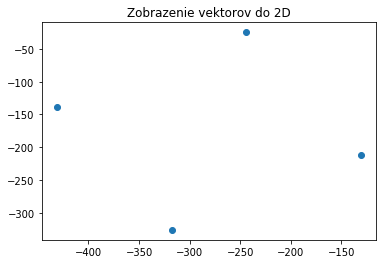

In [45]:
colors = (0,0,0)
plt.scatter(df['x'], df['y'])
plt.title('Zobrazenie vektorov do 2D')
plt.show()

# ---------------------------------------------------

In [ ]:
result = model.most_similar(positive=['žena', 'kráľ'], negative=['muž'])
print("{}: {:.4f}".format(*result[0]))

In [ ]:
print(model.doesnt_match("raňajky jedlo večera obed".split()))

In [ ]:
similarity = model.similarity('žena', 'muž')
similarity > 0.8

In [ ]:
result = model.similar_by_word("mačka")
print("{}: {:.4f}".format(*result[0]))
result

## WMD podobnosť

In [ ]:
sentence_obama = 'Obama hovorí ku médiam v Prahe'.lower().split()
sentence_president = 'Prezident víta novinárov v Česku'.lower().split()

In [ ]:
similarity = model.wmdistance(sentence_obama, sentence_president)
print("{:.4f}".format(similarity))

In [ ]:
distance = model.distance("média", "média")
distance

In [ ]:
result = model.similar_by_word("mačka")
result

In [ ]:
sim = model.n_similarity(['sushi', 'obchod'], ['japonská', 'reštaurácia'])
sim

In [ ]:
vector = model['počítač']  # numpy vector of a word
vector.shape

In [ ]:
vector = model.wv.word_vec('úrad', use_norm=True)
vector.shape

# ---------------------------------------------------

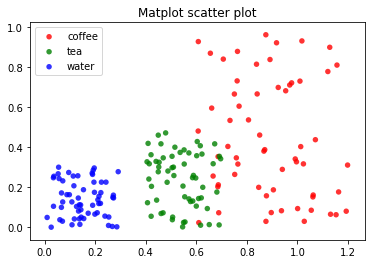

In [3]:
# Create data
N = 60
g1 = (0.6 + 0.6 * np.random.rand(N), np.random.rand(N))
g2 = (0.4+0.3 * np.random.rand(N), 0.5*np.random.rand(N))
g3 = (0.3*np.random.rand(N),0.3*np.random.rand(N))
 
data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("coffee", "tea", "water") 
 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,)
 
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()